In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('Data/dataset-case-iqvia.csv', sep=',')

df.head()

,week_dt,dsupp_id,product_id,region_nm,units_qty,product_attr_1,product_attr_2,product_attr_3
0,2024-03-31,6,233.0,Norte,6.0,B,C,B24
1,2024-03-01,6,233.0,Norte,1.0,B,C,B24
2,2024-08-01,6,233.0,Norte,1.0,B,C,B24
3,2024-09-29,6,233.0,Norte,1.0,B,C,B24
4,2024-05-01,6,233.0,Norte,3.0,B,C,B24


---

# EDA

## Dicionário de variáveis:
- week_dt: data correspondente ao primeiro dia da semana.
- dsupp_id: código de identificação do distribuidor do produto.
- product_id: código de identificação do produto.
- region_nm: macrorregião do ibge cuja loja, na qual o produto foi vendido, está situada.
- units_qty: quantidade de unidades vendidas na semana.
- product_attr_1, product_attr_2 e product_attr_3: atributos específicos dos produtos.

In [3]:
# Convertendo para datetime
df['week_dt'] = pd.to_datetime(df['week_dt'])

df = df.sort_values('week_dt', ascending=True).reset_index(drop=True)

df['week_dt']

0        2022-11-01
1        2022-11-01
2        2022-11-01
3        2022-11-01
4        2022-11-01
            ...    
120585   2024-10-27
120586   2024-10-27
120587   2024-10-27
120588   2024-10-27
120589   2024-10-27
Name: week_dt, Length: 120590, dtype: datetime64[ns]

In [4]:
print("="*50 + " Checagem Padrão " + "="*50)
print("Valores Nulos:")
for column in df.columns:
    if df[column].isnull().sum() == 0:
        print(f"The column {column} is ok!")
    else:
        print(f"The column {column} have {df[column].isnull().sum()} NaN values")
        
print("="*50 + " Representação dos valores nulos " + "="*50)
print(df.isnull().sum() / len(df))
print("="*100)
print("Linhas Duplicadas:")
if df.duplicated().sum() > 0:
    print("Found rows duplicated! Removing...")
    df.drop_duplicates(inplace=True)
else:
    print("Not Found rows duplicated")
print("="*50 + " Descrição Estatística " + "="*50)
df.describe()

================================================== Checagem Padrão ==================================================
Valores Nulos:
The column week_dt is ok!
The column dsupp_id is ok!
The column product_id have 1 NaN values
The column region_nm have 1 NaN values
The column units_qty have 1 NaN values
The column product_attr_1 have 1 NaN values
The column product_attr_2 have 1 NaN values
The column product_attr_3 have 1 NaN values
================================================== Representação dos valores nulos ==================================================
week_dt           0.000000
dsupp_id          0.000000
product_id        0.000008
region_nm         0.000008
units_qty         0.000008
product_attr_1    0.000008
product_attr_2    0.000008
product_attr_3    0.000008
dtype: float64
Linhas Duplicadas:
Not Found rows duplicated
================================================== Descrição Estatística ==================================================


,week_dt,dsupp_id,product_id,units_qty
count,120590,120590.000000,120589.000000,120589.000000
mean,2023-11-03 12:20:06.547806976,9.639265,204.745972,51.720213
min,2022-11-01 00:00:00,0.000000,1.000000,0.010000
25%,2023-05-01 00:00:00,6.000000,117.000000,2.000000
50%,2023-11-12 00:00:00,6.000000,214.000000,6.000000
75%,2024-04-28 00:00:00,11.000000,296.000000,23.000000
max,2024-10-27 00:00:00,27.000000,390.000000,24074.000000
std,NaN,6.682240,109.512936,284.258688


- Importante: Por representar menos de 0.0001% de dados nulos, podemos introduzir a remoção desse valores, não afetará a perfomance do modelo. Se a representação fosse >= 1% podemos decidir a imputação com `KNNImputer` ou utilizar a `média` das colunas. 

In [5]:
df.dropna(inplace=True)

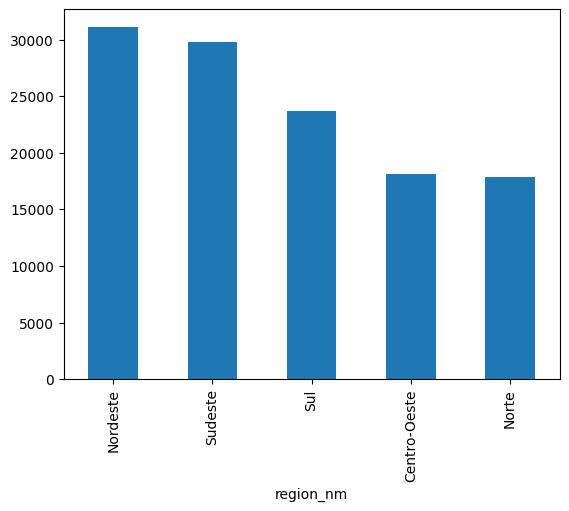

In [6]:
df['region_nm'].value_counts().plot(kind='bar')
plt.show()

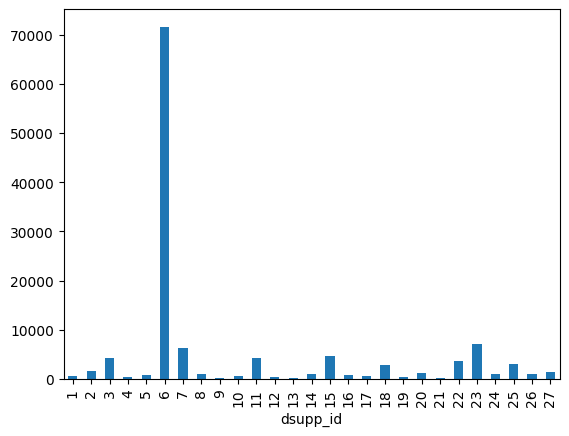

In [7]:
df['dsupp_id'].value_counts().sort_index().plot(kind='bar')
plt.show()

<Axes: >

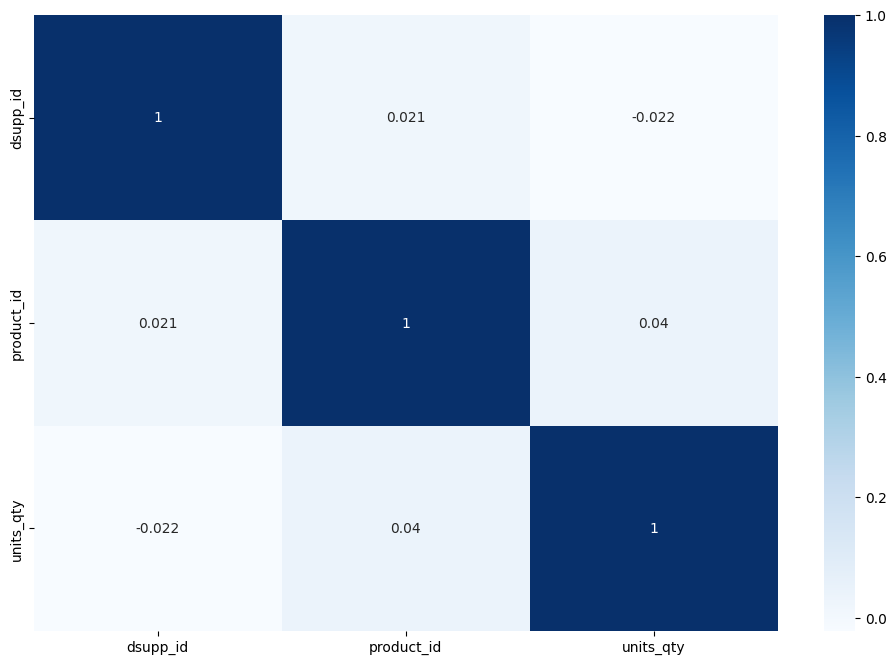

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

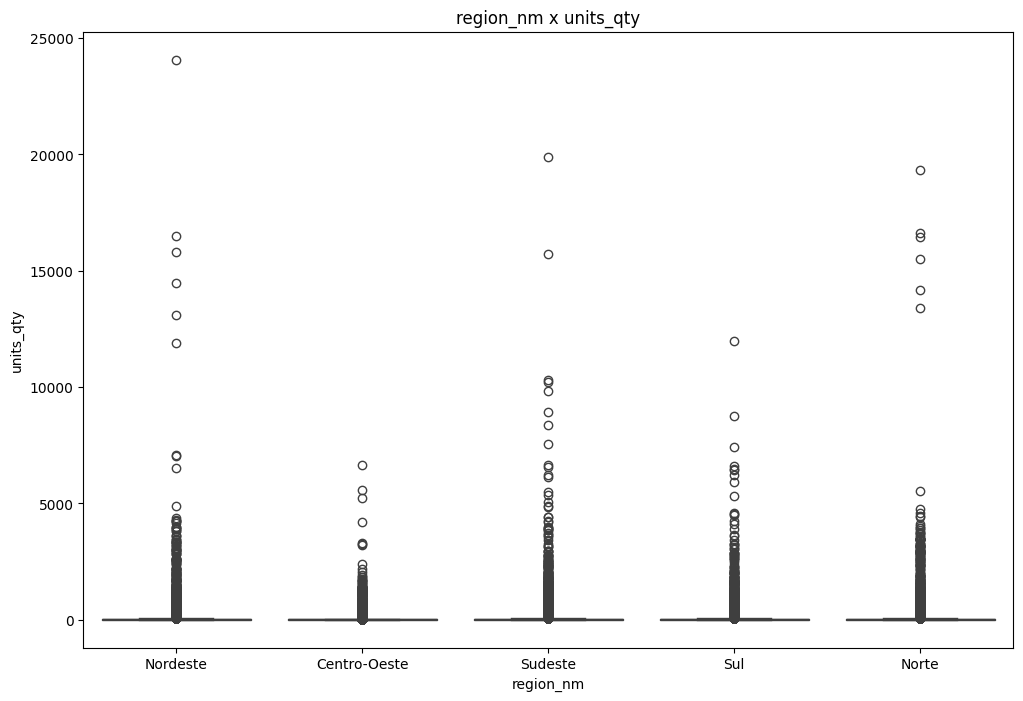

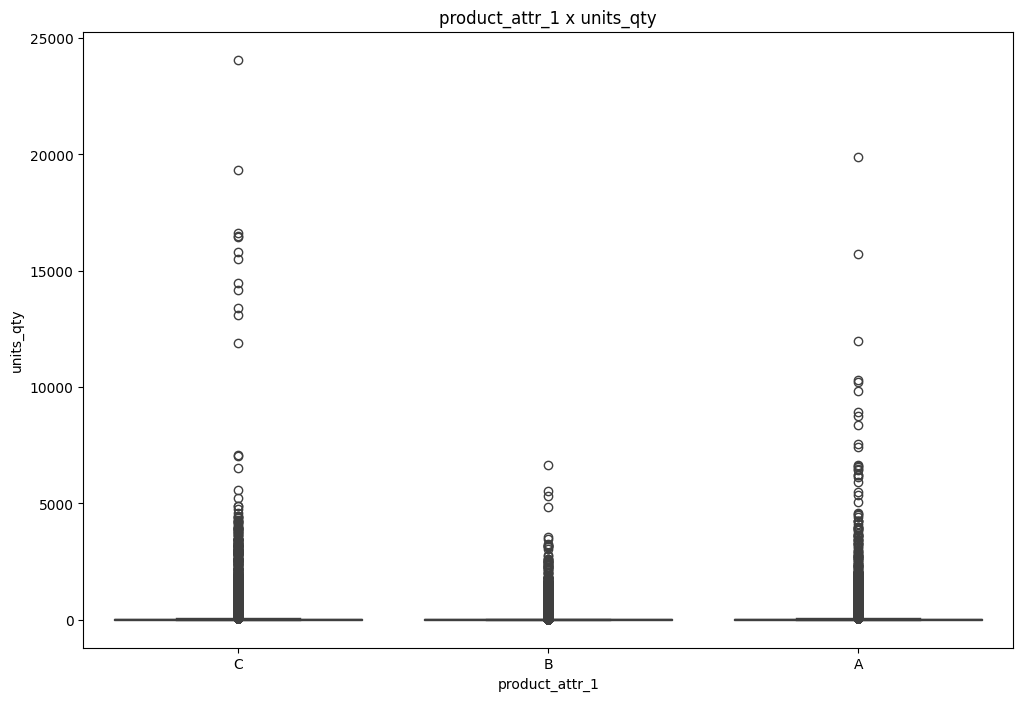

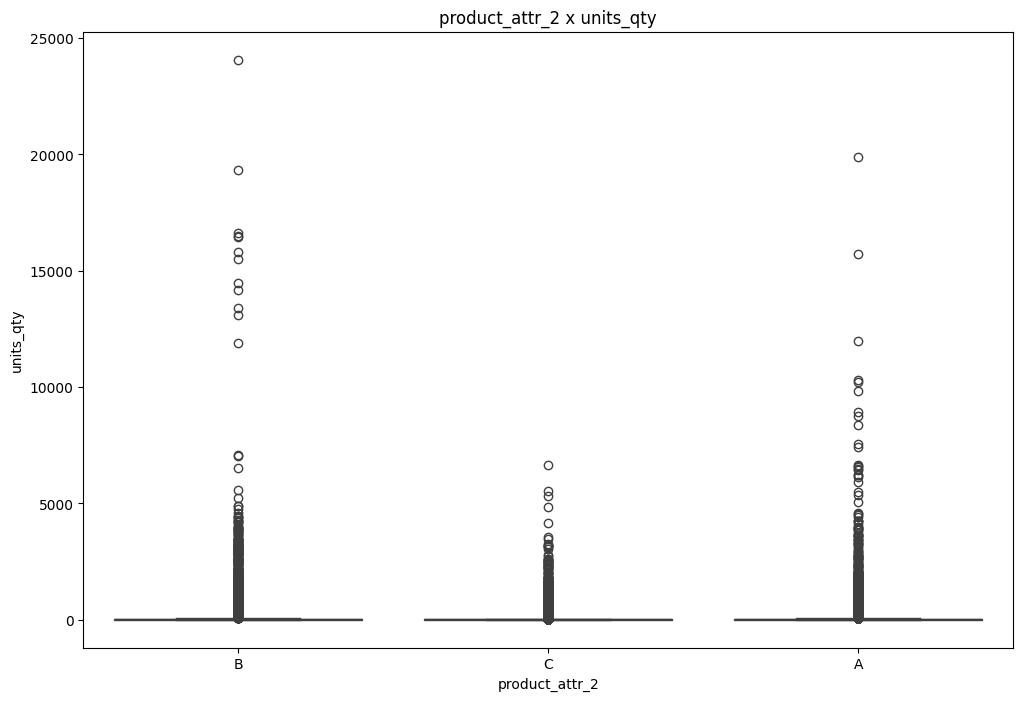

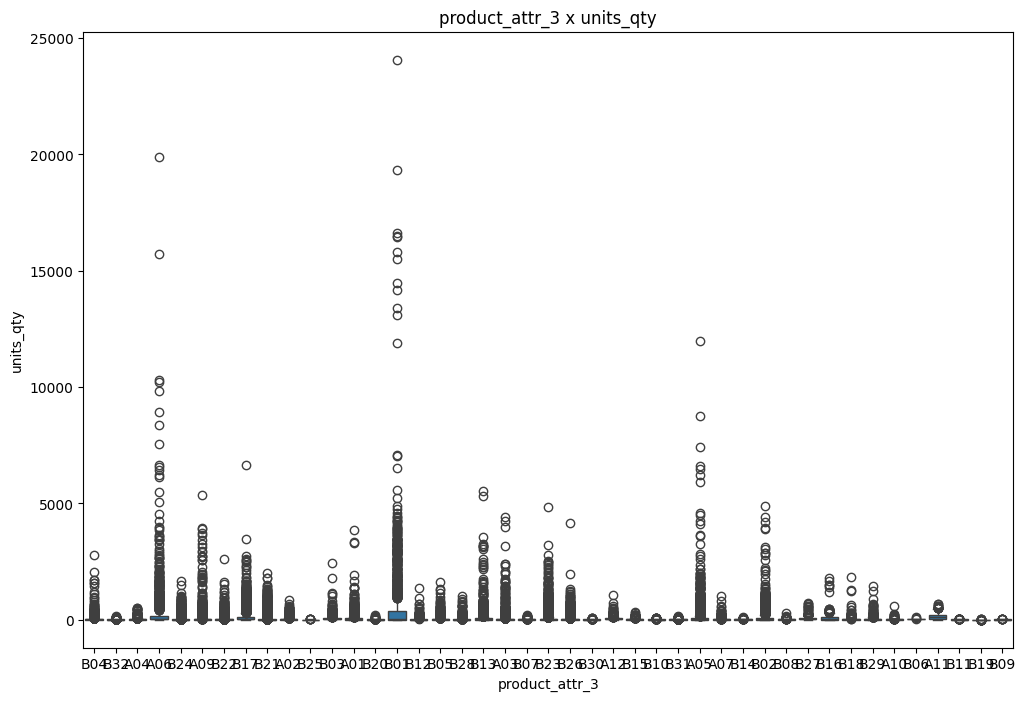

In [9]:
columns = ['region_nm', 'product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, y='units_qty', data=df)
    plt.title(f"{column} x units_qty")
    plt.show()

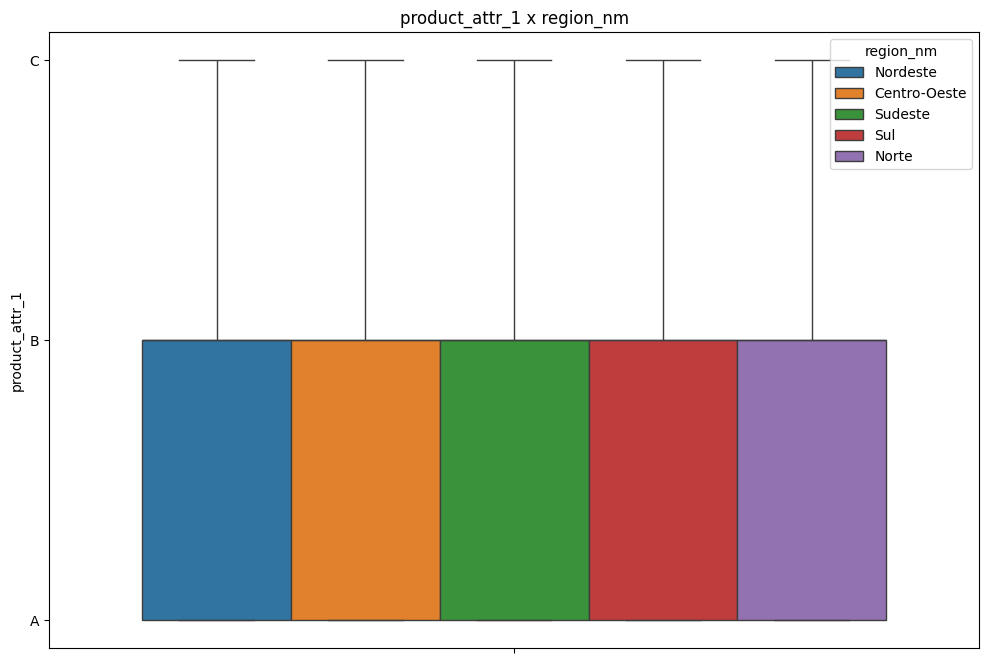

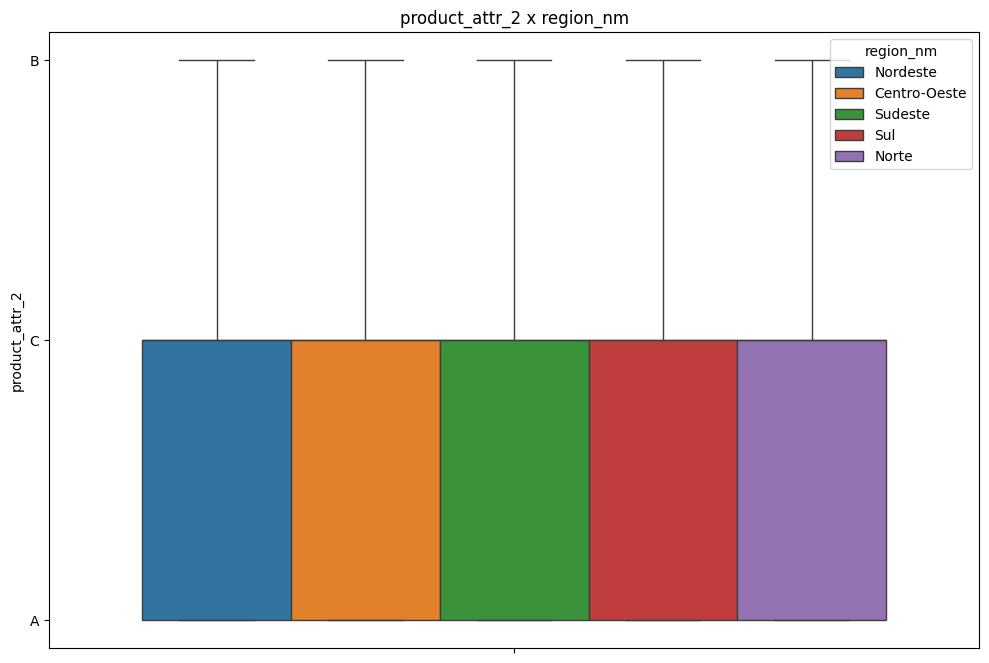

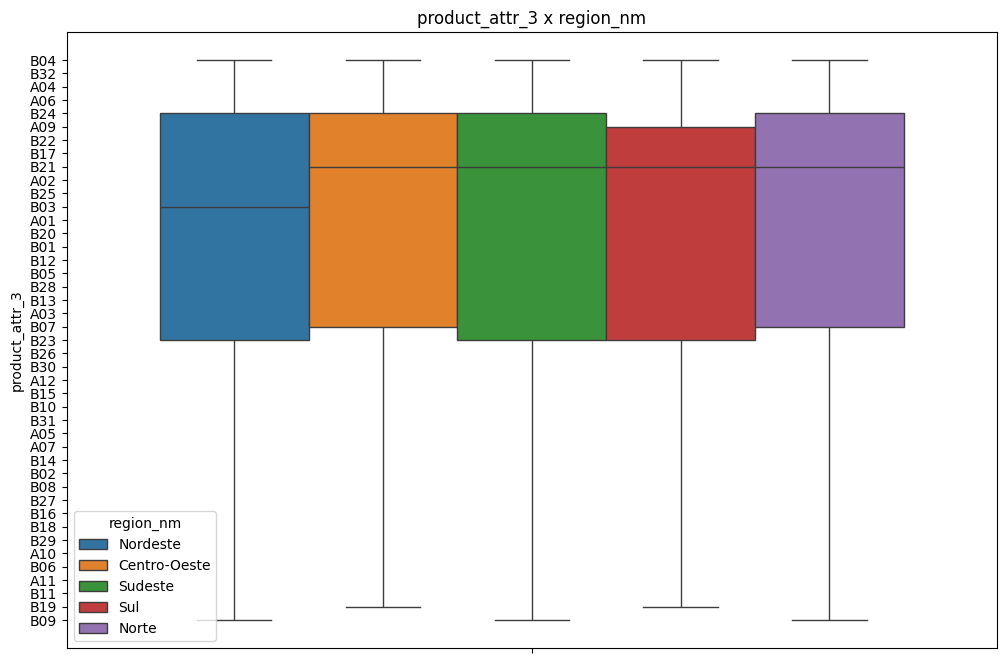

In [10]:
columns = ['product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=column, hue='region_nm', data=df)
    plt.title(f"{column} x region_nm")
    plt.show()

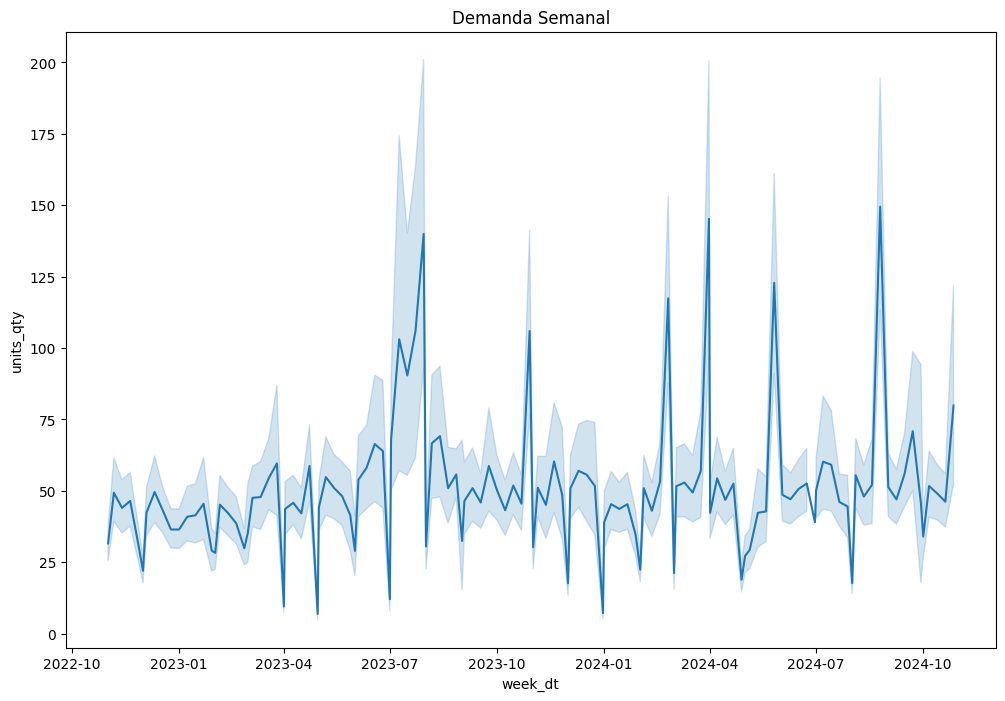

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', data=df)
plt.title("Demanda Semanal")
plt.show()

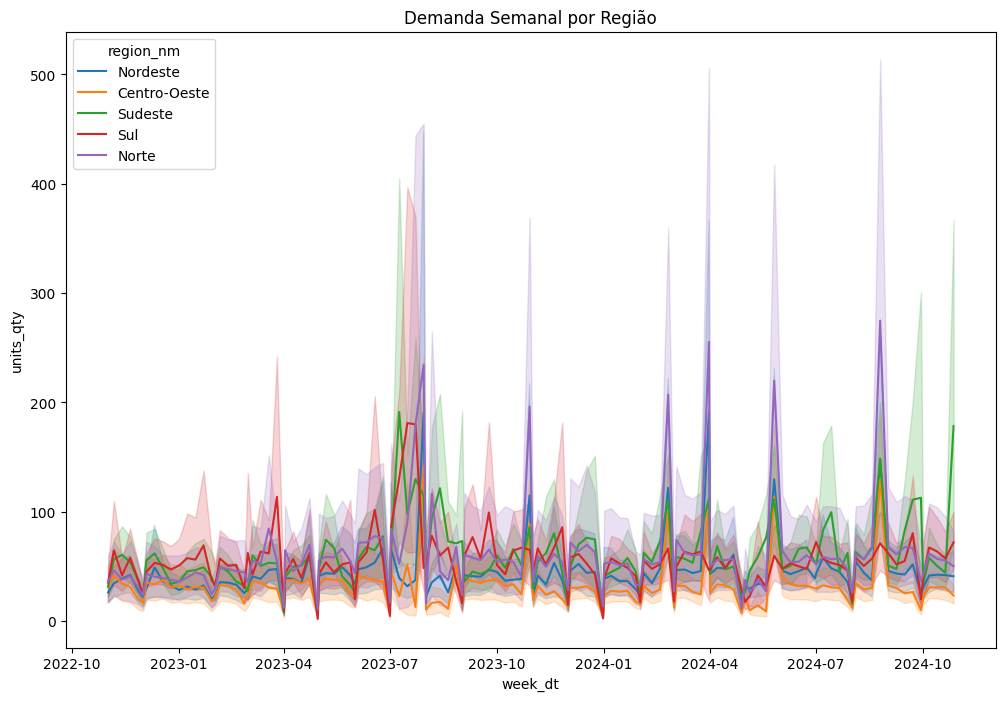

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', hue='region_nm', data=df)
plt.title("Demanda Semanal por Região")
plt.show()

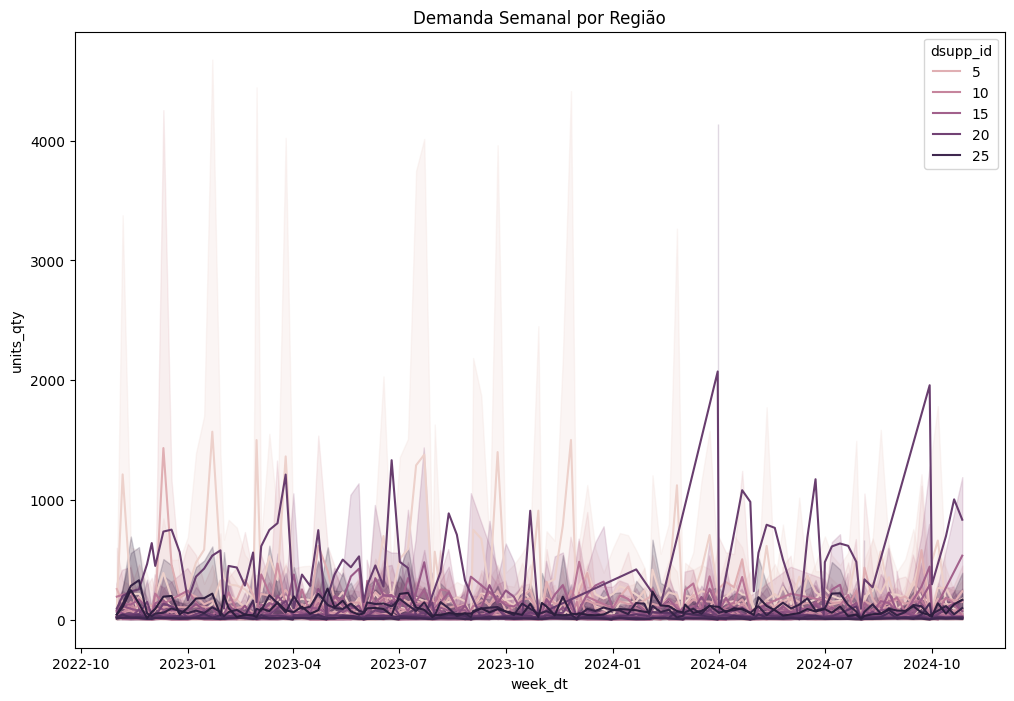

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', hue='dsupp_id', data=df)
plt.title("Demanda Semanal por Região")
plt.show()

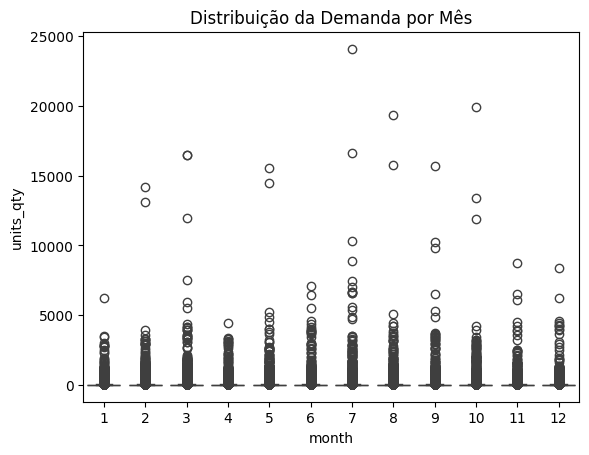

In [14]:
df['month'] = df['week_dt'].dt.month
sns.boxplot(x='month', y='units_qty', data=df)
plt.title('Distribuição da Demanda por Mês')
plt.show()

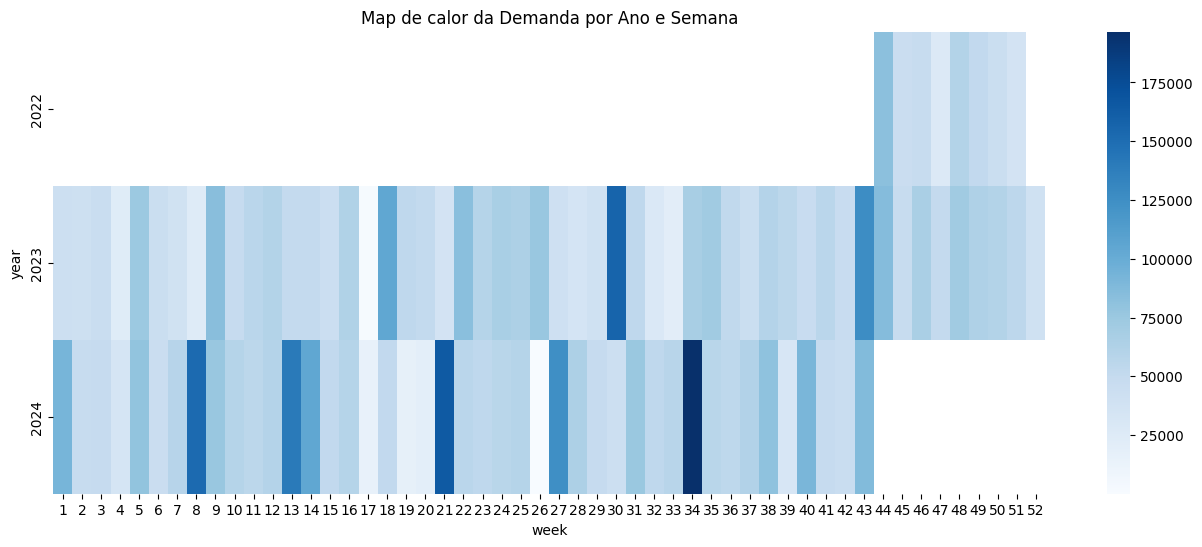

In [15]:
df['year'] = df['week_dt'].dt.year
df['week'] = df['week_dt'].dt.isocalendar().week
pivot = df.pivot_table(values='units_qty', index='year', columns='week', aggfunc='sum')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap='Blues', annot=False)
plt.title("Map de calor da Demanda por Ano e Semana")
plt.show()

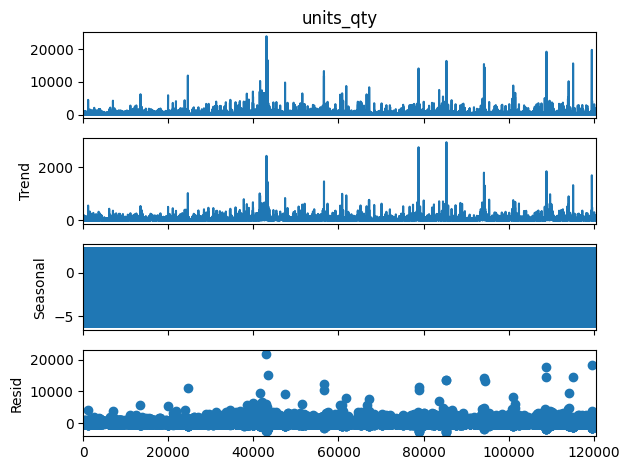

In [16]:
decomp = seasonal_decompose(df['units_qty'], model='additive', period=12)
decomp.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['units_qty'], autolag='AIC')

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1]<=0.05:
    print("Rejeita Hipótese Nula, é uma série estacionária")
else:
    print("Não rejeita hipótese nula, não é uma série estacionária") 

ADF Statistic: -34.6173803811398
p-value: 0.0
Rejeita Hipótese Nula, é uma série estacionária


---

# Conclusão

- Podemos levar em consideração que o maior números de demanadas se deve as regiões do `Nordeste` e `Sudeste`.
- Há presença de outliers na maior parde em regiões de `Nordeste`, `Sudeste` e `Norte`, o que pode indiciar certos eventos exclusivos que pode ocorrer nessas regiões (promoção, surto de doença).
- O distribuidor `6` possui o maior número de demandas
- Há também presença de outliers em algumas categorias dos produtos, o que indica que existem certos atributos com maior demanada
---
- No gráfico da `Demanda Semanal`:
    - não há uma tendência clara de alta 
    - Há picos a cada 2-3 meses, que pode representar uma sazonalidade
    - Esses picos podem estar associados a ciclos promocionais, datas sazonais do setor farmacêutico (ex: campanhas de vacinação, início de inverno/verão), ou renovação de estoque dos distribuidores.
    - Existência de outliers, acima de 150.
    - Apesar de um tendência não muita clara, visualmente não apresenta uma série estacionaria
---
- No gráfico `Decompose`:
    - O padrão é altamente variável, o que indica que não há uma tendência forte e estável de crescimento ou queda. A variação é mais influenciada por eventos pontuais do que por uma evolução constante.
    - Não foi detectado um padrão sazonal significativo com o período utilizado.
---
- No teste `ADF`:
    - ADF = -33.33, valor altamente negativo.
    - p-value = 0.0, ou seja, muito abaixo do limiar de 0.05.

---

# Feature Engineering
- Agrupamento por `week_dt`, `dsupp_id`, `region_nm`, `product_attr_1`, `product_attr_2` e `product_attr_3`
- Adicionando colunas temporais, lag features e rolling means

In [18]:
# Remoção do product_id, será utilizado apenas os atributos dos produtos como informações.
df.drop('product_id', axis=1, inplace=True)

In [19]:
df = df.groupby(['week_dt', 'dsupp_id', 'region_nm', 'product_attr_1', 'product_attr_2', 'product_attr_3'])['units_qty'].sum().reset_index()

In [20]:
df['month'] = df['week_dt'].dt.month
df['year'] = df['week_dt'].dt.year
df['week'] = df['week_dt'].dt.isocalendar().week.astype(int)

# Eventos Sazonais
# Carnaval
df['is_carnival_week'] = df['month'].isin([2]).astype(int)

# Inverno
df['is_winter'] = df['month'].isin([6, 7, 8]).astype(int)

# Verão (promoções em dezembro/janeiro)
df['is_summer'] = df['month'].isin([12, 1]).astype(int)

# Defasagem
for lag in [1, 2, 3, 4, 5, 6, 12]:
    df[f'lag_{lag}'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(lag)
    
# Média Móvel
df['rolling_mean_3'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).mean()
df['rolling_mean_6'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).mean()
df['rolling_mean_9'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=9).mean()

# Desvio padrão móvel
df['rolling_std_3'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).std()
df['rolling_std_6'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).std()
df['rolling_std_9'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=9).std()

df = df.dropna()

# Pré-processamento

In [21]:
np.unique(df['region_nm'])

array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
      dtype=object)

In [22]:
np.unique(df['dsupp_id'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [23]:
np.unique(df['product_attr_1'])

array(['A', 'B', 'C'], dtype=object)

In [24]:
np.unique(df['product_attr_2'])

array(['A', 'B', 'C'], dtype=object)

In [25]:
np.unique(df['product_attr_3'])

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A09', 'A10',
       'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07',
       'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16',
       'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
       'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32'], dtype=object)

In [26]:
df = pd.get_dummies(data=df, columns=['region_nm', 'dsupp_id', 'product_attr_1', 'product_attr_2', 'product_attr_3'], dtype=int)

---

# Selection Features

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

# Remoção do week_dt, as features temporais que adicionamos já estabalece o vínculo com week_dt 
X = df.drop(columns=['units_qty', 'week_dt']).values
columns = df.drop(columns=['units_qty', 'week_dt']).columns
y = df['units_qty'].values

selection_features = ExtraTreesRegressor(random_state=42)
selection_features.fit(X, y)

ExtraTreesRegressor(random_state=42)

In [29]:
importances = selection_features.feature_importances_
index = []

for i in range(len(importances)):
    if importances[i] >= 0.05:
        index.append(i)

columns[index]

Index(['lag_5', 'rolling_std_6', 'dsupp_id_6'], dtype='object')

- Os `product_attr_*` não mostraram nenhuma importância em relação ao target, e para evitar uma maior complexidade computacional iremos remover todos os atributos
- Apesar do `dsupp` e alguns `region` não apresentarem muita importância, elas são cruciais para o modelo final, então não será feito a remoção

# Dataset Final

- Após a seleção de features e a criação de algumas delas, já podemos definir o dataset final, sendo agrupado por `week_dt`, `region_nm` e `dsupp_id` com a somatória de `units_qty` e selecionando algumas features que contém maiores importâncias

In [30]:
df_final = pd.read_csv('Data/dataset-case-iqvia.csv', sep=',')

df_final['week_dt'] = pd.to_datetime(df_final['week_dt'])

df_final = df_final.sort_values('week_dt', ascending=True)

df_final = df_final.groupby(['week_dt', 'dsupp_id', 'region_nm'])['units_qty'].sum().reset_index()

# Adição das features temporais
df_final['month'] = df_final['week_dt'].dt.month
df_final['year'] = df_final['week_dt'].dt.year
df_final['week'] = df_final['week_dt'].dt.isocalendar().week.astype(int)

# Features de lags
for lag in [1, 2, 3, 4, 5, 6, 12]:
    df_final[f'lag_{lag}'] = df_final.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(lag)

# Médias móveis e desvios
df_final['rolling_mean_3'] = df_final.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).mean()
df_final['rolling_mean_6'] = df_final.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).mean()
df_final['rolling_std_3'] = df_final.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).std()
df_final['rolling_std_6'] = df_final.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).std()

df_final = df_final.dropna()

# Salvar os valores de dsupp_id e region_nm para previões
df_meta = df_final[['dsupp_id', 'region_nm']].reset_index(drop=True)

df_final = pd.get_dummies(data=df_final, columns=['dsupp_id', 'region_nm'], dtype=int)

df_final = df_final.reset_index(drop=True)

---

---

# Validação Cruzada - TimeSeries

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [32]:
X = df_final.drop(columns=['units_qty', 'week_dt'])
y = df_final['units_qty']

time_split = TimeSeriesSplit(n_splits=5)

In [33]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [34]:
results = []

for name, model in models.items():
    print(f"Treinando modelo: {name}")
    model_mse = []
    model_r2 = []
    model_mae = []

    for train_idx, test_idx in time_split.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        model_mse.append(mse)
        model_r2.append(r2)
        model_mae.append(mae)
    
    results.append({
        'Model': name,
        'Média MSE': np.mean(model_mse),
        'Média R2': np.mean(model_r2),
        'Média MAE': np.mean(model_mae)
    })
    
    print(f"{name} - MSE médio: {np.mean(model_mse):.2f} | R2 médio: {np.mean(model_r2):.2f} | MAE médio: {np.mean(model_mae):.2f}")

metrics_df = pd.DataFrame(results)

Treinando modelo: Random Forest
Random Forest - MSE médio: 8301296.25 | R2 médio: 0.40 | MAE médio: 897.69
Treinando modelo: Gradient Boosting
Gradient Boosting - MSE médio: 9610895.34 | R2 médio: 0.29 | MAE médio: 1009.34
Treinando modelo: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 22
[LightGBM] [Info] Start training from score 1410.671592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [35]:
metrics_df

,Model,Média MSE,Média R2,Média MAE
0,Random Forest,8.301296e+06,0.398470,897.689077
1,Gradient Boosting,9.610895e+06,0.287186,1009.344861
2,LightGBM,9.092823e+06,0.318305,1012.151541
3,XGBoost,9.292070e+06,0.324664,971.687683


In [36]:
df_final.describe()['units_qty']

count     3313.000000
mean      1667.468606
min          1.000000
25%        128.000000
50%        479.000000
75%       1348.000000
max      45449.840000
std       3434.270287
Name: units_qty, dtype: float64

- Comparando a média de `units_qty`, o modelo `Random Forest` entregou uma melhor perfomance, apresentando um erro de 53,8% comparado a média.

---

# Tuning Model

In [37]:
from sklearn.model_selection import GridSearchCV

X = df_final.drop(columns=['units_qty', 'week_dt'])
y = df_final['units_qty']

time_split = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30,None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', 
    cv=time_split,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

model_mse = []
model_mae = []
model_r2 = []

for train_idx, test_idx in time_split.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_model.fit(X_train, y_train)
    pred = best_model.predict(X_test)

    model_mse.append(mean_squared_error(y_test, pred))
    model_mae.append(mean_absolute_error(y_test, pred))
    model_r2.append(r2_score(y_test, pred))

print("Métricas:")
print(f"Média MSE: {np.mean(model_mse)}")
print(f"Média MAE: {np.mean(model_mae)}")
print(f"Média R² : {np.mean(model_r2)}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Métricas:
Média MSE: 7630897.9969303105
Média MAE: 851.4276152499799
Média R² : 0.4455552782322848


---

# Real vs Previsão

In [38]:
predicted = []
actual = []
dates = []

time_split = TimeSeriesSplit(n_splits=5)

# Rodar o modelo ao longo do tempo com TSCV (simulando o histórico)
for train_idx, test_idx in time_split.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    week_test = df_final.iloc[test_idx]['week_dt']

    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    
    predicted.extend(y_pred)
    actual.extend(y_test)
    dates.extend(week_test)

df_pred = pd.DataFrame({
    'week_dt': dates,
    'y_true': actual,
    'y_pred': predicted
})

df_pred.sort_values('week_dt', inplace=True)

print("Métricas")
print(f"MSE: {mean_squared_error(df_pred['y_true'], df_pred['y_pred'])}")
print(f"MAE: {mean_absolute_error(df_pred['y_true'], df_pred['y_pred'])}")
print(f"R² : {r2_score(df_pred['y_true'], df_pred['y_pred'])}")

Métricas
MSE: 7630897.9969303105
MAE: 851.4276152499799
R² : 0.43013513690328875


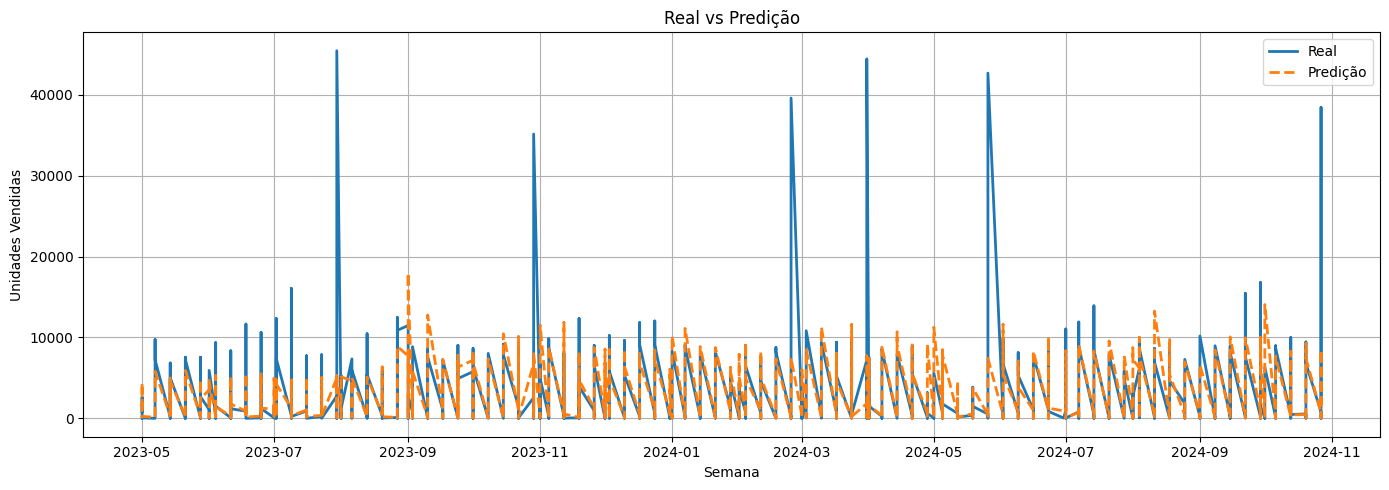

In [39]:
plt.figure(figsize=(14, 5))
plt.plot(df_pred['week_dt'], df_pred['y_true'], label='Real', linewidth=2)
plt.plot(df_pred['week_dt'], df_pred['y_pred'], label='Predição', linestyle='--', linewidth=2)
plt.title('Real vs Predição')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

# Previsão por Região e Distribuidor

In [40]:
predicted = []
actual = []
dates = []
regions = []
dsupps = []

for train_idx, test_idx in time_split.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    week_test = df_final.iloc[test_idx]['week_dt']

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    predicted.extend(y_pred)
    actual.extend(y_test)
    dates.extend(week_test)
    regions.extend(df_meta.iloc[test_idx]['region_nm'].values)
    dsupps.extend(df_meta.iloc[test_idx]['dsupp_id'].values)

df_pred = pd.DataFrame({
    'week_dt': dates,
    'dsupp_id': dsupps,
    'region_nm': regions,
    'y_true': actual,
    'y_pred': predicted
})

print("Métricas")
print(f"MSE: {mean_squared_error(df_pred['y_true'], df_pred['y_pred'])}")
print(f"MAE: {mean_absolute_error(df_pred['y_true'], df_pred['y_pred'])}")
print(f"R² : {r2_score(df_pred['y_true'], df_pred['y_pred'])}")

Métricas
MSE: 7630897.9969303105
MAE: 851.4276152499799
R² : 0.43013513690328875


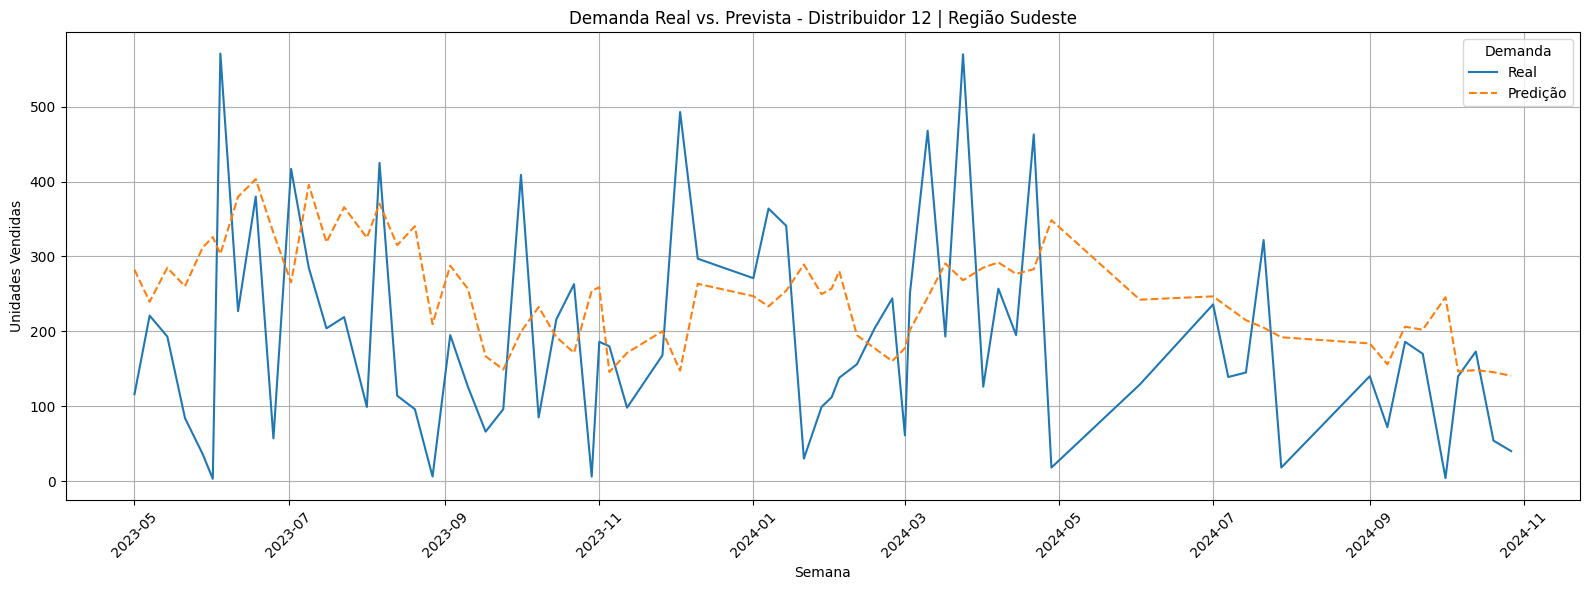

In [41]:
def plot_dsupp_region(dsupp_id, region_nm):
    df_subset = df_pred[(df_pred['dsupp_id'] == dsupp_id) & (df_pred['region_nm'] == region_nm)]

    if df_subset.empty:
        print(f"Nenhum dado encontrado para dsupp_id={dsupp_id} e region_nm={region_nm}.")
        return

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=df_subset, x='week_dt', y='y_true', label='Real', errorbar=None)
    sns.lineplot(data=df_subset, x='week_dt', y='y_pred', label='Predição', linestyle='--', errorbar=None)
    plt.title(f'Demanda Real vs. Prevista - Distribuidor {dsupp_id} | Região {region_nm}')
    plt.xlabel('Semana')
    plt.ylabel('Unidades Vendidas')
    plt.xticks(rotation=45)
    plt.legend(title='Demanda')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_dsupp_region(12, "Sudeste")

---

# Fontes de Apoio

- [Time Series Plot](https://www.mathworks.com/help/matlab/ref/timeseries.plot.html)
- [Seasonal Decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)
- [Preprocessing Time Series](https://www.nousot.com/resources/preprocessing-for-time-series/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html)